In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importing libraries
import os
import zipfile
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import keras
%matplotlib inline
#import K-Means
from sklearn.cluster import KMeans
# important metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
path = "/content/drive/My Drive/House_Room_Dataset"
# datasets = path + "/datasets/train"

In [4]:
from PIL import Image
import os
import numpy as np

images = []
imageNames = []

path = "/content/drive/My Drive/House_Room_Dataset"

with os.scandir(path) as files:
    for file in files:
        with os.scandir(file) as rooms:
            print(file.name)
            for imgs in rooms:
                print(imgs)
                if imgs.name.endswith('.jpg'):
                    file_path = os.path.join(path, file.name, imgs.name)
                    print(file_path)
                    # Append file names to imageNames
                    imageNames.append(file_path)

                    # Open image using PIL
                    try:
                        img = Image.open(file_path)
                        # Resize image
                        img = img.resize((32, 32))
                        # Convert image to numpy array
                        img_array = np.array(img, dtype=np.float32)
                        # Append images to images array
                        images.append(img_array)
                    except Exception as e:
                        print(f"Error processing image {file_path}: {e}")

print(images)
data = np.array(images)
print(data.sum())


Streaming output truncated to the last 5000 lines.
<DirEntry 'kitchen_912.jpg'>
/content/drive/My Drive/House_Room_Dataset/Kitchen/kitchen_912.jpg
<DirEntry 'kitchen_933.jpg'>
/content/drive/My Drive/House_Room_Dataset/Kitchen/kitchen_933.jpg
<DirEntry 'kitchen_925.jpg'>
/content/drive/My Drive/House_Room_Dataset/Kitchen/kitchen_925.jpg
<DirEntry 'kitchen_93.jpg'>
/content/drive/My Drive/House_Room_Dataset/Kitchen/kitchen_93.jpg
<DirEntry 'kitchen_923.jpg'>
/content/drive/My Drive/House_Room_Dataset/Kitchen/kitchen_923.jpg
<DirEntry 'kitchen_918.jpg'>
/content/drive/My Drive/House_Room_Dataset/Kitchen/kitchen_918.jpg
<DirEntry 'kitchen_922.jpg'>
/content/drive/My Drive/House_Room_Dataset/Kitchen/kitchen_922.jpg
<DirEntry 'kitchen_91.jpg'>
/content/drive/My Drive/House_Room_Dataset/Kitchen/kitchen_91.jpg
<DirEntry 'kitchen_927.jpg'>
/content/drive/My Drive/House_Room_Dataset/Kitchen/kitchen_927.jpg
<DirEntry 'kitchen_919.jpg'>
/content/drive/My Drive/House_Room_Dataset/Kitchen/kitchen_9

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [25]:
# Normalize data by dividing every element by 255.0
data = data/255.0

# Reshape data array to a 2D array with a single column and as many rows as there are elements in the original data array
reshaped_data = data.reshape(len(data),-1)

In [26]:
data[0]

array([[[0.00336794, 0.00306036, 0.0028912 ],
        [0.0033218 , 0.00295271, 0.00278354],
        [0.00324491, 0.0028143 , 0.00256824],
        ...,
        [0.00329104, 0.00218378, 0.00059977],
        [0.00346021, 0.00304498, 0.00269127],
        [0.00366013, 0.00356786, 0.00359862]],

       [[0.00338331, 0.00309112, 0.00292195],
        [0.00333718, 0.0030296 , 0.00282968],
        [0.00330642, 0.00292195, 0.00272203],
        ...,
        [0.00318339, 0.00232218, 0.0014456 ],
        [0.00347559, 0.0031065 , 0.0028912 ],
        [0.00364475, 0.00356786, 0.00361399]],

       [[0.00341407, 0.00312188, 0.00301423],
        [0.00338331, 0.00307574, 0.00292195],
        [0.00335256, 0.00301423, 0.00282968],
        ...,
        [0.00321415, 0.00250673, 0.00196847],
        [0.00349097, 0.00318339, 0.00296809],
        [0.00364475, 0.00358324, 0.00359862]],

       ...,

       [[0.00327566, 0.00307574, 0.00296809],
        [0.00326028, 0.00304498, 0.00290657],
        [0.0033218 , 0

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Convert the images and labels to numpy arrays
images = np.array(reshaped_data)
labels = np.array(imageNames)

# Split the data into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

In [30]:
# X_train = reshaped_data
X_train = train_images

In [31]:
kmeans = KMeans(n_clusters=14, random_state=22)
clusters = kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
# Fit the best model on the entire training data
clusters.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=14, random_state=22)

In [33]:
pip install joblib


In [34]:
import joblib

# Save the model using joblib
joblib.dump(clusters,"/content/drive/My Drive/linksclassificationmodels/bestmodel.joblib")




['/content/drive/My Drive/linksclassificationmodels/bestmodel.joblib']

In [35]:
from sklearn.metrics import silhouette_score
# Load the trained model from the saved file using joblib
clusters = joblib.load("/content/drive/My Drive/linksclassificationmodels/bestmodel.joblib")


# Predict clusters for the test images
test_clusters = clusters.predict(test_images)

# Calculate silhouette score
silhouette_avg = silhouette_score(test_images, test_clusters)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.056839119642972946


In [36]:
clusters.labels_

array([ 9,  8,  2, ..., 12, 10, 12], dtype=int32)

In [37]:
groups = {}
for file, cluster in zip(imageNames, clusters.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [38]:
from tensorflow.keras.preprocessing.image import load_img

In [39]:
# function that lets you view a cluster (based on identifier)
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to +30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

Clipping cluster size from 318 to +30


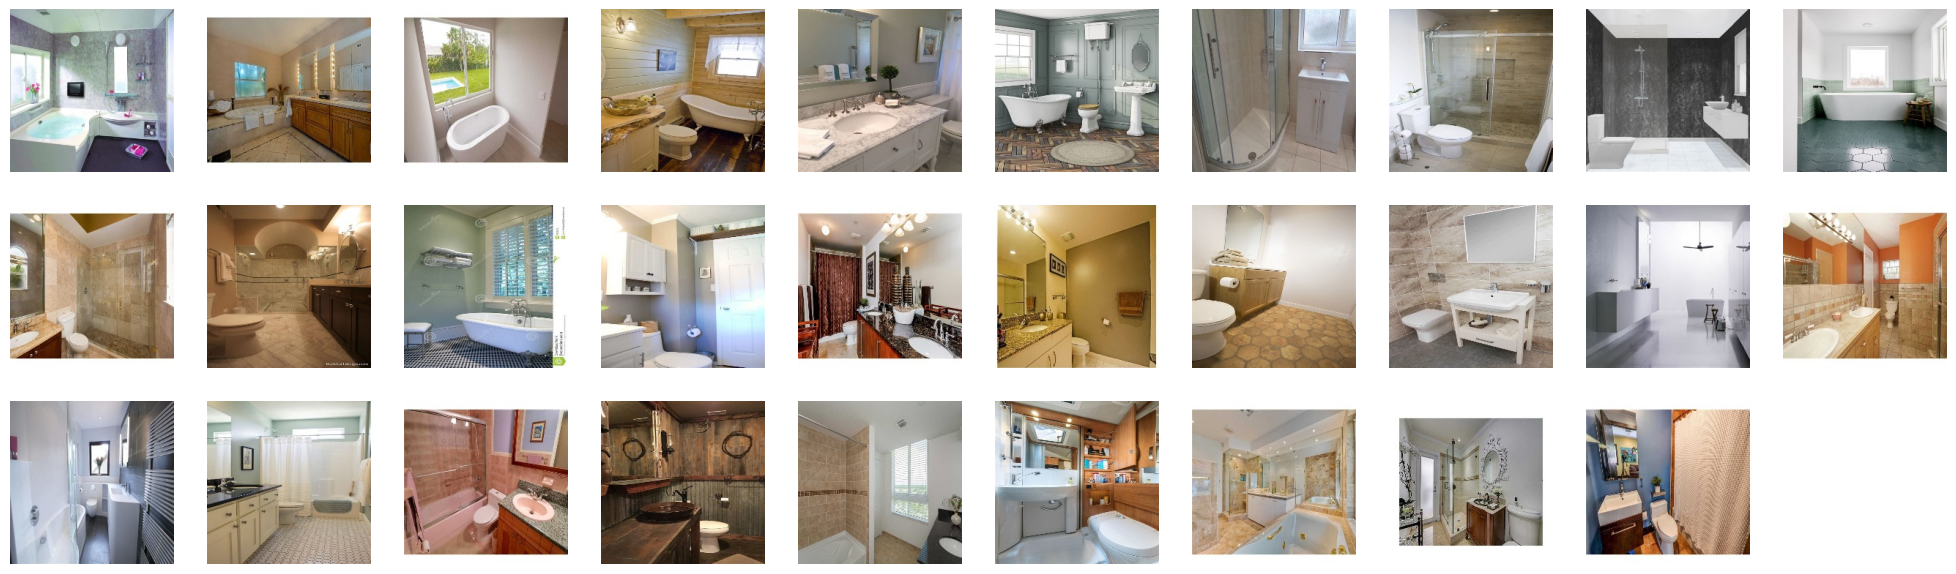

In [40]:
view_cluster(0)

Clipping cluster size from 340 to +30


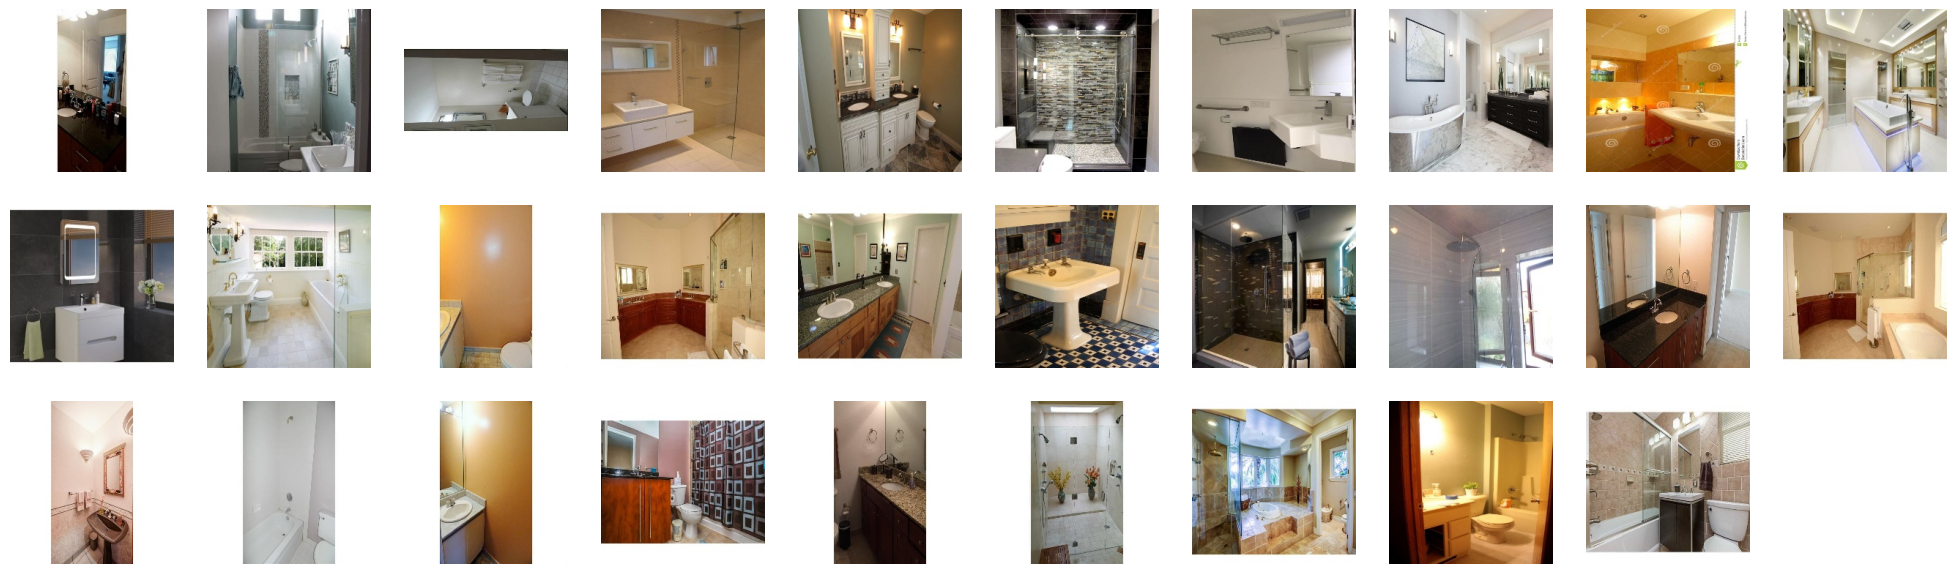

In [41]:
view_cluster(1)

Clipping cluster size from 293 to +30


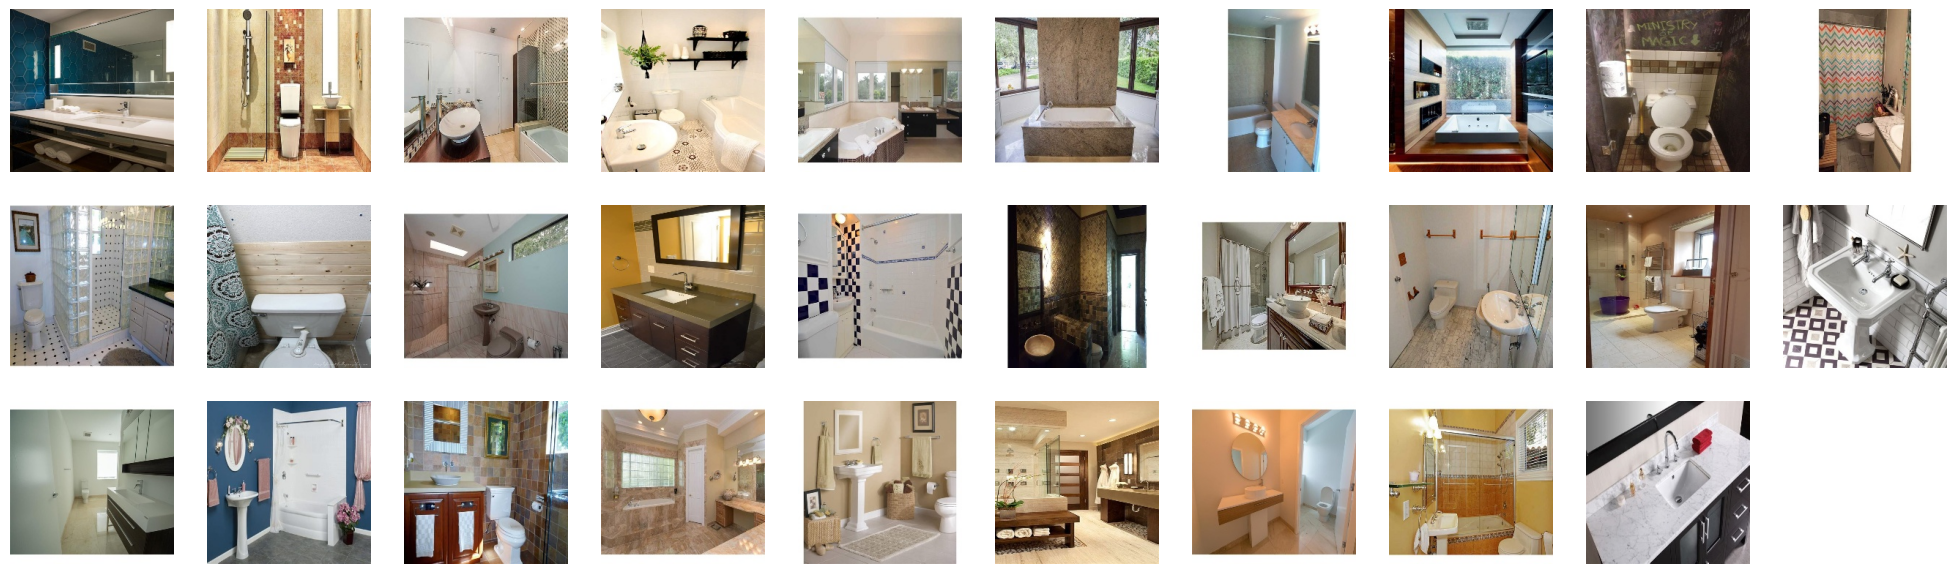

In [42]:
view_cluster(6)

Clipping cluster size from 287 to +30


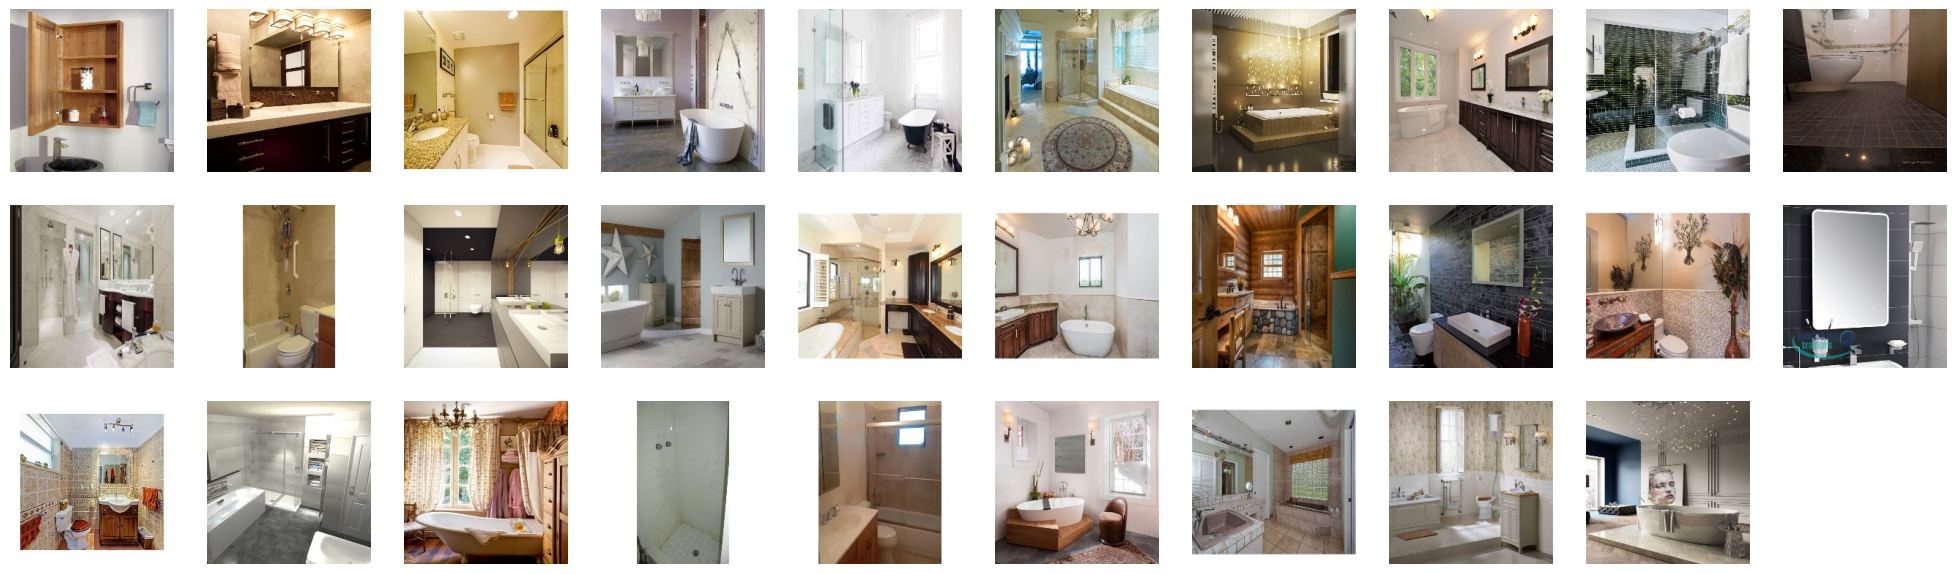

In [43]:
view_cluster(13)

In [44]:
# Experiment with different values of K
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=22)
    clusters = kmeans.fit(X_train)
    test_clusters = clusters.predict(test_images)
    silhouette_avg = silhouette_score(test_images, test_clusters)
    print(f"K={k}, Silhouette Score: {silhouette_avg}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=2, Silhouette Score: 0.151697039604187


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=3, Silhouette Score: 0.08959708362817764


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=4, Silhouette Score: 0.09554312378168106


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=5, Silhouette Score: 0.08293231576681137


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=6, Silhouette Score: 0.09001892805099487


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=7, Silhouette Score: 0.0830482617020607


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=8, Silhouette Score: 0.07354360073804855


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=9, Silhouette Score: 0.06902475655078888


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=10, Silhouette Score: 0.05997469276189804


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=11, Silhouette Score: 0.05940939858555794


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=12, Silhouette Score: 0.05705465376377106


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=13, Silhouette Score: 0.05679760500788689


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=14, Silhouette Score: 0.056839119642972946


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=15, Silhouette Score: 0.05503746494650841


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=16, Silhouette Score: 0.04844140261411667


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=17, Silhouette Score: 0.048813529312610626


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=18, Silhouette Score: 0.04858969897031784


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=19, Silhouette Score: 0.0486459955573082


In [46]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00


Clipping cluster size from 318 to +30


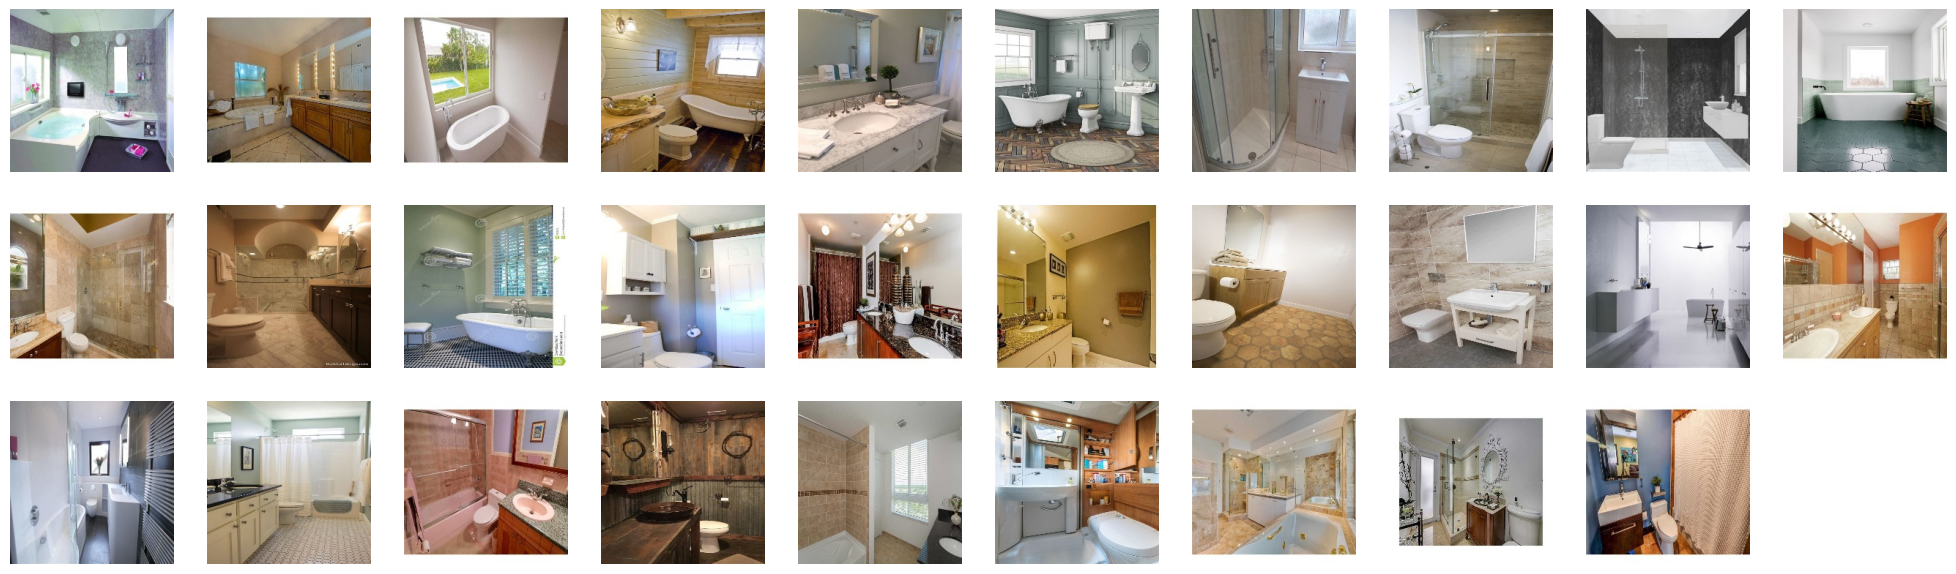

In [49]:
# clustering_app.py
import streamlit as st
import joblib
import numpy as np
from tensorflow.keras.preprocessing.image import load_img

def view_cluster(cluster, groups):
    plt.figure(figsize=(25, 25))
    files = groups.get(cluster, [])
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to +30")
        files = files[:29]

    for index, file in enumerate(files):
        plt.subplot(10, 10, index + 1)
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

def main():
    st.title("Image Clustering App")

    # Load the trained model from the saved file using joblib
    clusters = joblib.load("/content/drive/My Drive/linksclassificationmodels/bestmodel.joblib")

    # Sidebar for user input
    st.sidebar.header("Settings")
    cluster_id = st.sidebar.slider("Select Cluster", min_value=0, max_value=13, step=1, value=0)

    # Predict clusters for the test images
    test_clusters = clusters.predict(test_images)

    # Display silhouette score
    silhouette_avg = silhouette_score(test_images, test_clusters)
    st.sidebar.text(f"Silhouette Score: {silhouette_avg}")

    # Display images in the selected cluster
    view_cluster(cluster_id, groups)

if __name__ == "__main__":
    main()


In [53]:
!npm install localtunnel


npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.877s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [ ]:
!streamlit run clustering_app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com



35.227.176.99
npx: installed 22 in 2.27s
your url is: https://nine-ends-ask.loca.lt
